In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('insurance_claims.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df=df.drop('_c39',axis=1)
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

#Check total_claim_amount and injury_claim as they are correlated highly.

## EDA

<AxesSubplot:>

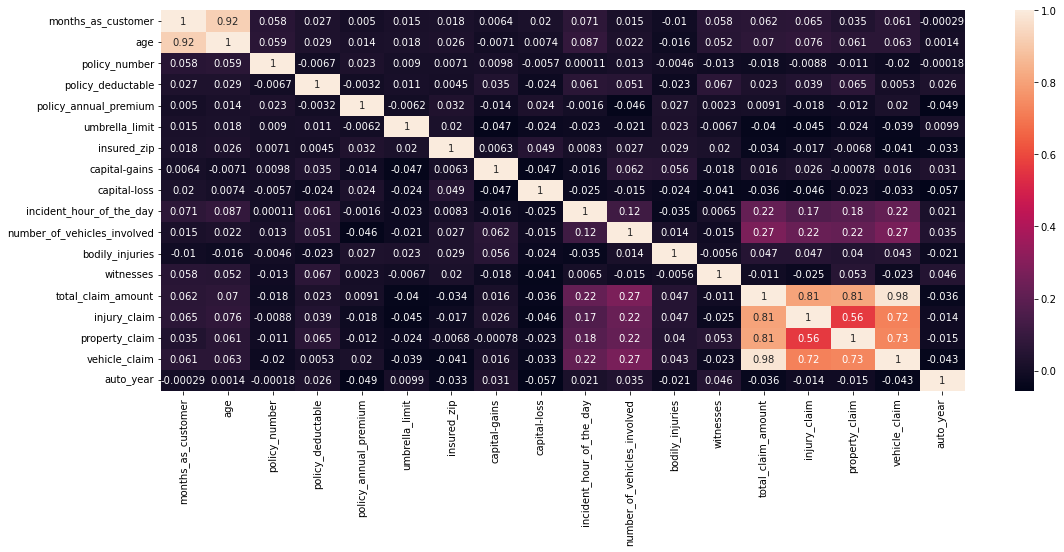

In [8]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True)
#total_claim_amount, injury_claim,property_claim,vehicle_claim are highly correlated.

In [9]:
df['fraud_reported'].value_counts()
##Label is highly skewed.

N    753
Y    247
Name: fraud_reported, dtype: int64

Here we see that almost 25% fraud reported. Let’s explore data wrt our labels

In [10]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

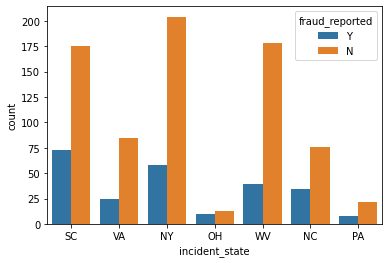

In [11]:
sns.countplot(df['incident_state'],hue=df['fraud_reported'])

<AxesSubplot:xlabel='age', ylabel='count'>

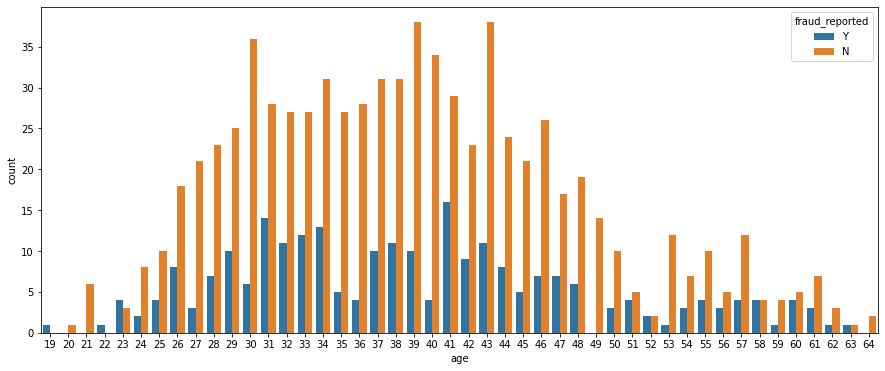

In [12]:
plt.figure(figsize=(15,6))
#f = plt.figure()
#f.set_figwidth(4)
#f.set_figheight(1)
column={'age','fraud_reported'}
sns.countplot(df['age'],hue=df['fraud_reported'])


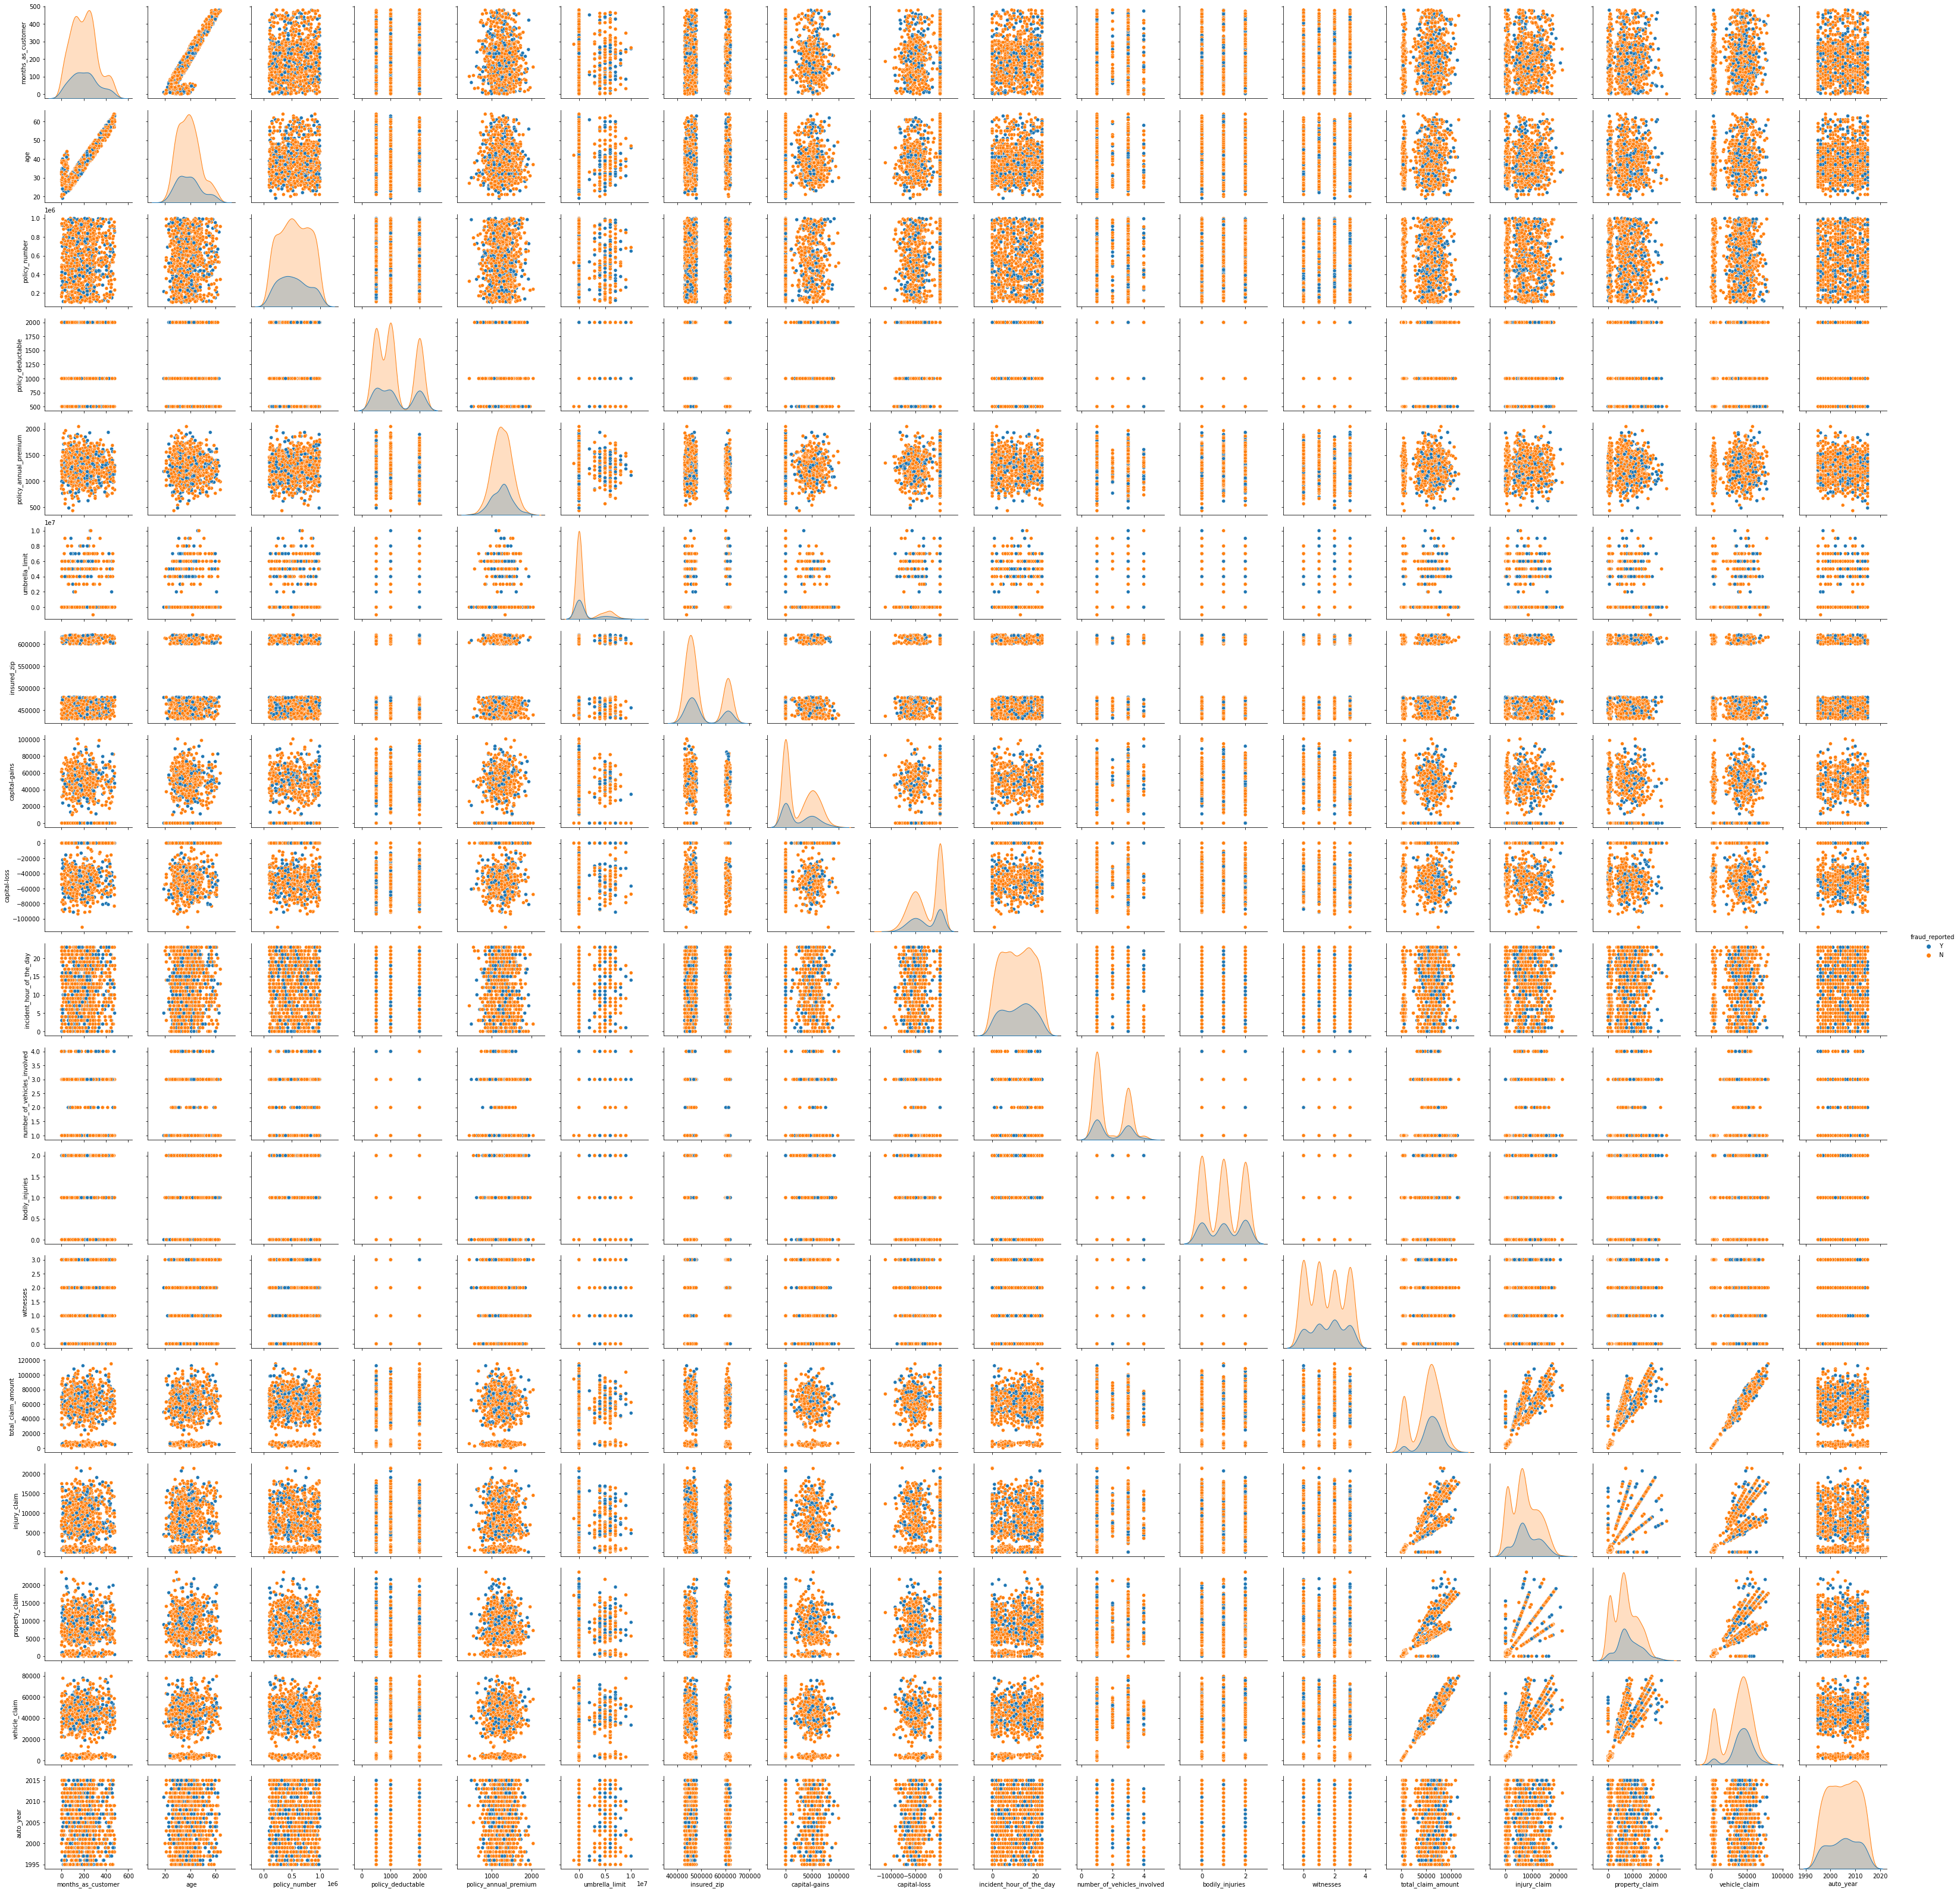

In [19]:
sns.pairplot(df,hue='fraud_reported')


<Figure size 5040x5040 with 0 Axes>

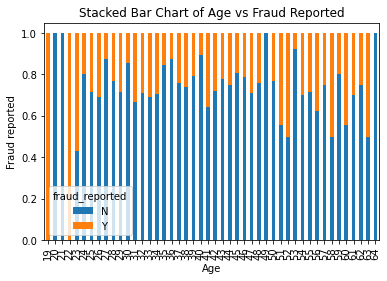

In [20]:
plt.figure(figsize=(70,70))
table=pd.crosstab(df.age, df.fraud_reported)    ##Would creates ages features indicating Fraud_reported or not.
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)   ##Convert ages to scale in 1.
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=12)
plt.xlabel('Age')
plt.ylabel('Fraud reported')
plt.show()
#Lower age group tend to file more fraud claims wrt total filling.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

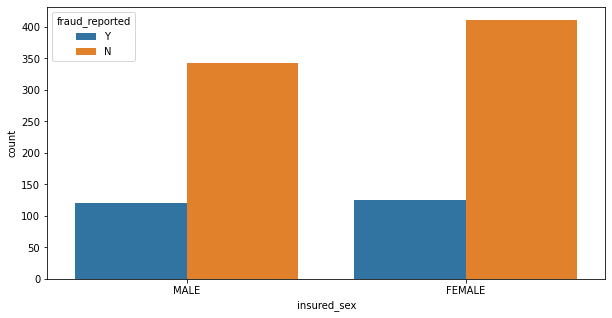

In [21]:
figure=plt.figure(figsize=(10,5))
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])
#Female % are more in reporting genuine claims

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

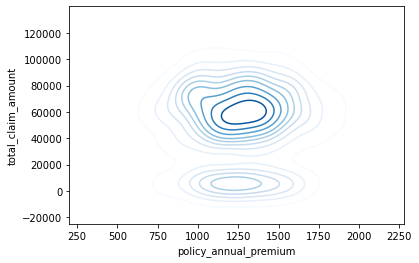

In [22]:
sns.kdeplot(x=df['policy_annual_premium'],y=df['total_claim_amount'],cmap='Blues')
#Max policy premmium payer (1000 to 1500) are the ones who tend to claim their premium the most.

In [23]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count()
ax.sort_values(ascending=False)
##Highest No. of claims are in January and February 2105.

incident_date
2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-02-04    24
2015-01-24    24
2015-01-10    24
2015-01-19    23
2015-01-08    22
2015-01-30    21
2015-01-13    21
2015-01-31    20
2015-02-12    20
2015-02-06    20
2015-02-22    20
2015-02-21    19
2015-02-23    19
2015-01-21    19
2015-01-01    19
2015-01-12    19
2015-01-14    19
2015-01-18    18
2015-02-25    18
2015-01-20    18
2015-02-14    18
2015-01-03    18
2015-02-01    18
2015-02-28    18
2015-02-26    17
2015-01-06    17
2015-02-24    17
2015-01-09    17
2015-02-08    17
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-02-13    16
2015-01-28    15
2015-02-18    15
2015-01-17    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-02-09    13
2015-02-03    13
2015-01-27    13
2015-01-23    13
2015-01-04    12
2015-03-01    12
2015-01-02    11
2015-01-29    11
2015-01-26    11
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-02-19    10
2015-01-25    10


<Figure size 1296x432 with 0 Axes>

<AxesSubplot:xlabel='incident_type', ylabel='count'>

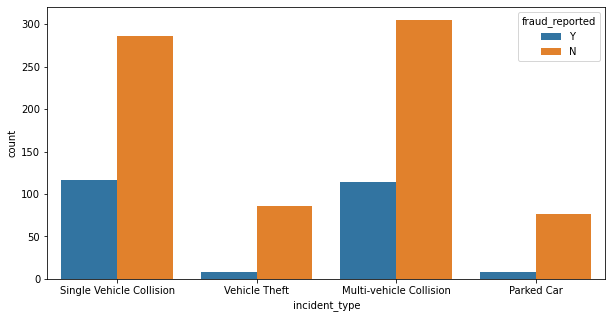

In [24]:
#Fraud_reported vs Policy state has no such predictable relation in Bar chart/Stack bar chart
figure=plt.figure(figsize=(10,5))
sns.countplot(df['incident_type'],hue=df['fraud_reported'])

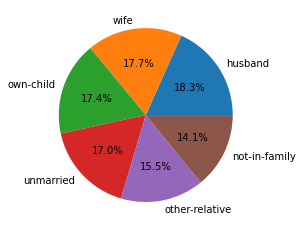

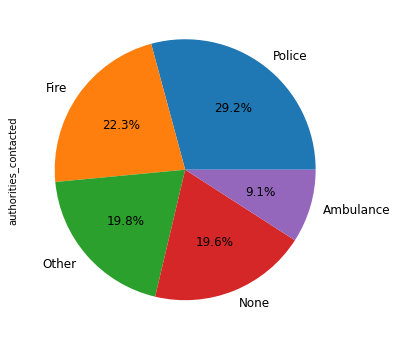

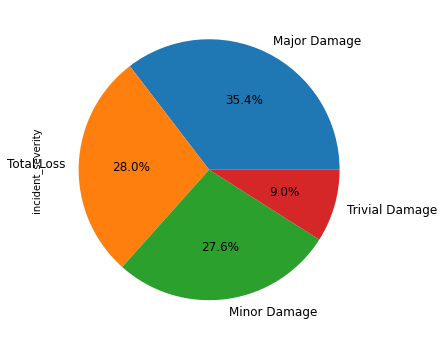

In [28]:
ax = (df['insured_relationship'].value_counts()*100.0)                                                                        
plt.pie(autopct='%.1f%%',x=ax, labels =['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family']) 

fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'], fontsize=12) 

fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],fontsize=12)  
#ax.set_title('% Relationship')
#plt.show()

<AxesSubplot:xlabel='insured_hobbies', ylabel='total_claim_amount'>

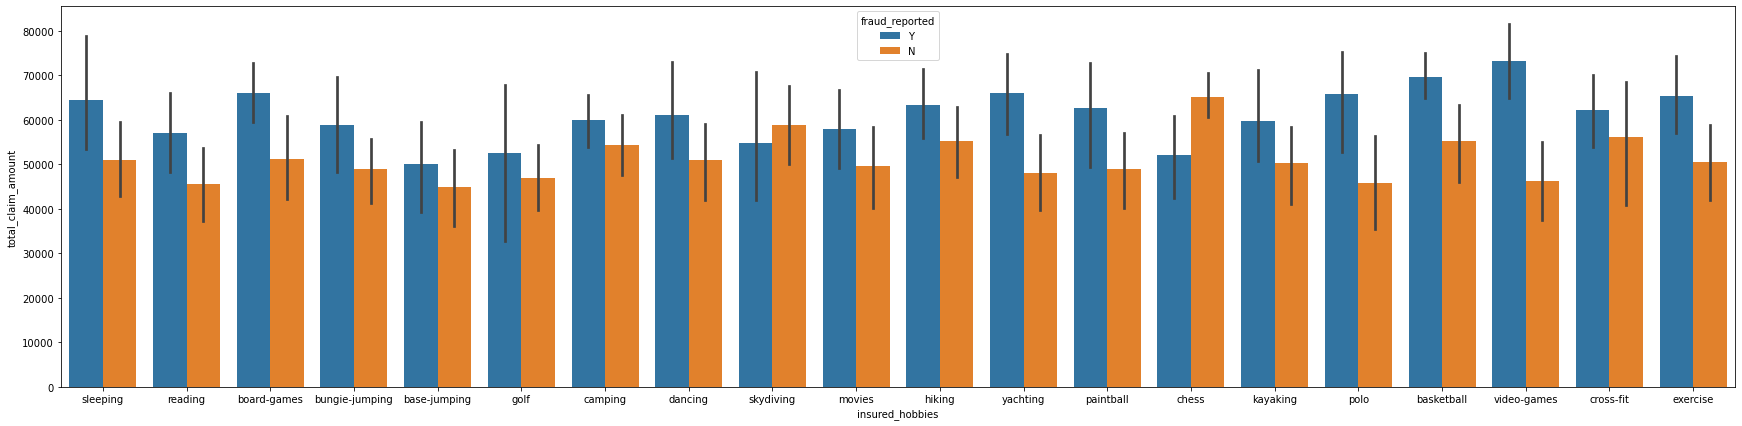

In [29]:
fig= plt.figure(figsize=(30,7))
sns.barplot(x=df['insured_hobbies'],y=df['total_claim_amount'],hue=df['fraud_reported'])